# GeoPandas IO   csv, shp geojson, etc

https://geohackweek.github.io/vector/04-geopandas-intro/


In [1]:
import os, sys,glob

import folium
from IPython.display import display

from shapely.geometry import mapping

%matplotlib inline

import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

In [2]:
def csv_latlon2points(csvfile):
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    crs = {'init': 'epsg:4283'}  # GDA94
    geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

    return geo_df

In [3]:
# path2csv='E:/Data/MT_Datasets/WenPingJiang_SHP/PhaseTensorTipper_Params_1.0986Hz.csv'
path2csv='/e/Data/GA_Works/E_Data_Modelling_Isa/EDI_edited_10Hz_1000s_SHP/phase_tensor_tipper_0.011Hz.csv'
path2dir=os.path.dirname(path2csv)
mygdf=csv_latlon2points(path2csv)

In [4]:
# mygdf.head()
mygdf.shape

(380, 15)

In [5]:
mygdf.crs

{'init': 'epsg:4283'}

In [6]:
shape_fname='/tmp/geopandas_made.shp'
outshp=os.path.join(path2dir,shape_fname)
mygdf.to_file(outshp, driver='ESRI Shapefile')


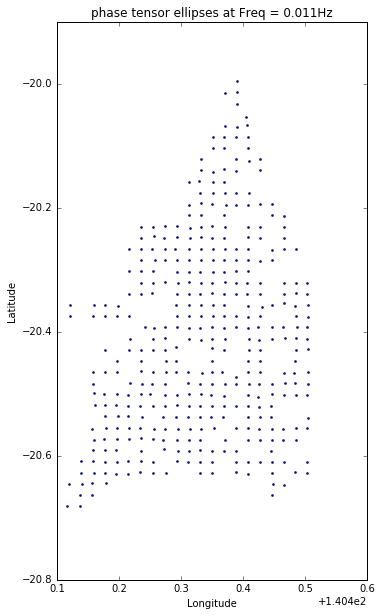

In [7]:
title_str='phase tensor ellipses at Freq = 0.011Hz'
myax = mygdf.plot(figsize=[20,10], linewidth=2.0, color='b', cmap='jet')

myax.set_xlim([140.5,141.0])
myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

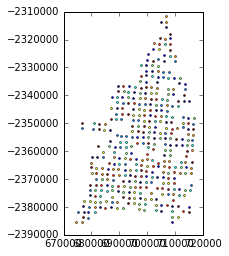

In [8]:
mygdf.to_crs({'init':'epsg:3112'}).plot()  # 3112 is GDA94/GALambertConformal

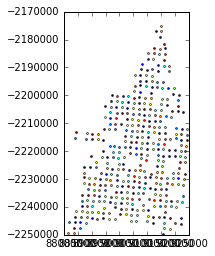

In [9]:
mygdf.to_crs({'init':'epsg:3577'}).plot()  #EPSG Projection 3577 - GDA94 / Australian Albers 

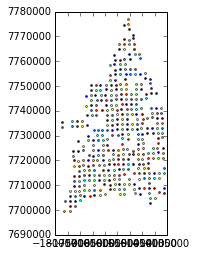

In [10]:
mygdf.to_crs({'init':'epsg:28355'}).plot() #28355 http://spatialreference.org/ref/epsg/gda94-mga-zone-55/

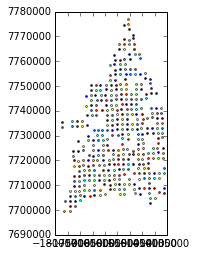

In [11]:
mygdf.to_crs({'init':'epsg:32755'}).plot() #32755 is WGS84/UTMS55

In [12]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

#mpl.rcParams['figure.figsize']=(8,30)

In [13]:
gdf_utm54=mygdf.to_crs({'init':'epsg:32754'})  #.plot()

outshp=os.path.join(path2dir,'geopandas_made_utm54.shp')

gdf_utm54.to_file(outshp, driver='ESRI Shapefile')


In [14]:

geojson = mygdf.to_json()
bounds = mygdf.total_bounds


In [15]:
print bounds

(140.51647222222223, -20.681111111111111, 140.90569444444446, -19.99580555555556)


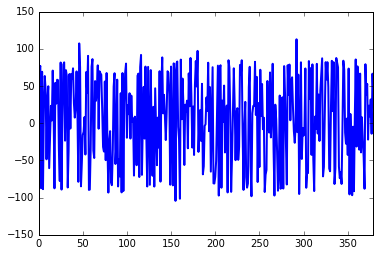

In [16]:
mygdf['azimuth'].plot()

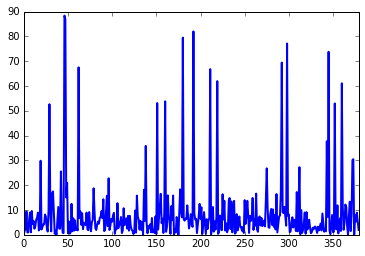

In [17]:
mygdf['skew'].abs().plot()

In [18]:
mygdf.columns

Index([u'station', u'freq', u'lon', u'lat', u'phi_min', u'phi_max', u'azimuth',
       u'skew', u'n_skew', u'elliptic', u'tip_mag_re', u'tip_mag_im',
       u'tip_ang_re', u'tip_ang_im', u'geometry'],
      dtype='object')

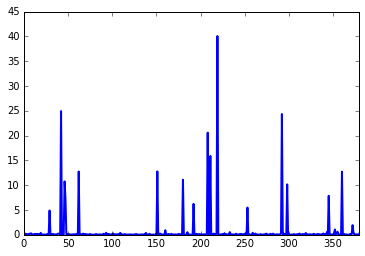

In [19]:
mygdf['elliptic'].plot()

In [20]:
mygdf['skew'].describe()

count    380.000000
mean       1.861410
std       15.972646
min      -88.374668
25%       -2.229280
50%        1.671990
75%        6.704637
max       77.142246
Name: skew, dtype: float64

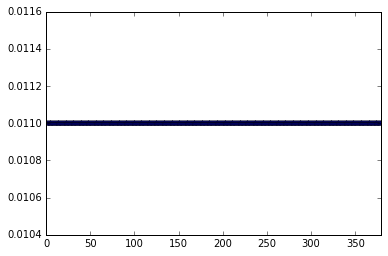

In [21]:
#mygdf['frequency'].plot(marker='*')   # tolerance ftol=10%

mygdf['freq'].plot(marker='*')   # tolerance ftol=10%

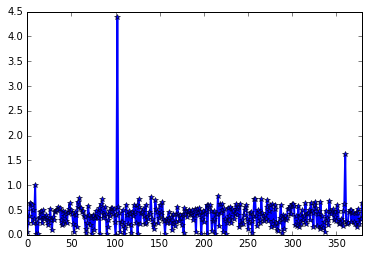

In [22]:
mygdf['tip_mag_re'].plot(marker='*')  

#mygdf['tip_ang_re'].plot(marker='*')  

In [23]:
# output jeojson?

## https://geohackweek.github.io/vector/04-geopandas-intro/

OR

## http://nbviewer.jupyter.org/github/geohackweek/vector/blob/gh-pages/docker/notebooks/geopandas_intro.ipynb
Like shapely, these spatial data types are limited to discrete entities/features and do not address continuously varying rasters or fields.

While GeoPandas spatial objects can be assigned a Coordinate Reference System (CRS), operations can not be performed across CRS’s. Plus, geodetic (“unprojected”, lat-lon) CRS are not handled in a special way; the area of a geodetic polygon will be in degrees.


In [24]:
mygdf.iloc[-1]  # last row or feature

station                                          16-L19S14
freq                                                 0.011
lon                                                 140.77
lat                                               -20.3571
phi_min                                            52.3424
phi_max                                            73.4006
azimuth                                            33.8599
skew                                               -1.9474
n_skew                                             -3.8948
elliptic                                           0.16747
tip_mag_re                                        0.646433
tip_mag_im                                        0.083058
tip_ang_re                                         60.2971
tip_ang_im                                         127.591
geometry      POINT (140.7701388888889 -20.35711111111111)
Name: 379, dtype: object

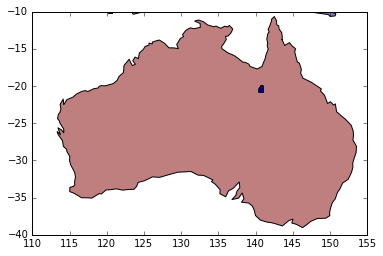

In [25]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5)

myax.set_xlim([138,150])
myax.set_ylim([-30,-10])

myax.set_xlim([110,155])
myax.set_ylim([-40,-10])
              
mygdf.plot(ax=myax, figsize=(10, 20), marker='o', color='blue', markersize=2);

# Construct phase_tensor Ellipses and Tippers 

# write to shape files with different projections: wgs84, utm, etc.

In [26]:
import numpy as np
    
from shapely.geometry import Point, Polygon, LineString, LinearRing

def create_tipper_real_shp(csvfile,  arr_size=4):
    """ create tipper lines shape file.  
    Must use a GIS software such as ArcGIS to display and add an arrow at each line's end
    arr_size=4  how long will be the line (arrow)
    """
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    
    #geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)
    
    pdf['tip_re'] = pdf.apply(lambda x: 
        LineString([(float(x.lon), float(x.lat)), 
                    (float(x.lon)+ arr_size*x.tip_mag_re*np.cos(-np.deg2rad(x.tip_ang_re)),
                     float(x.lat)+ arr_size*x.tip_mag_re*np.sin(-np.deg2rad(x.tip_ang_re)))]), axis=1)


    pdf = gpd.GeoDataFrame(pdf, geometry='tip_re')
    
    return pdf


In [27]:
tipdf=create_tipper_real_shp(path2csv, arr_size=0.1)

tipdf.to_file('tip_re.shp', driver='ESRI Shapefile')

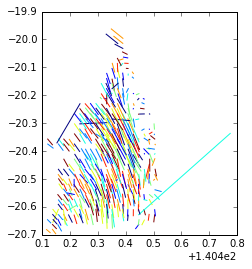

In [28]:
tipdf.plot()

In [29]:
tipdf.head()

,station,freq,lon,lat,phi_min,phi_max,azimuth,skew,n_skew,elliptic,tip_mag_re,tip_mag_im,tip_ang_re,tip_ang_im,tip_re
0,16-L27S18,0.011,140.847333,-20.211417,66.680124,72.833926,83.719534,-0.139040,-0.278081,0.044109,0.061712,0.044870,132.346446,102.351629,LINESTRING (140.8473333333334 -20.211416666666...
1,16-L32S14,0.011,140.789417,-20.120611,54.825063,60.585882,73.448306,1.625532,3.251065,0.049916,0.234450,0.066212,82.418669,73.025345,LINESTRING (140.7894166666666 -20.120611111111...
2,16-L28S15E,0.011,140.788778,-20.194694,44.906398,70.713348,76.923715,2.249667,4.499334,0.223205,0.374692,0.029163,79.031401,95.342400,LINESTRING (140.7887777777777 -20.194694444444...
3,16-L21S16,0.011,140.807028,-20.320611,52.355647,71.402171,-87.434311,9.431710,18.863420,0.153902,0.644360,0.060434,66.456542,117.751384,LINESTRING (140.8070277777778 -20.320611111111...
4,16-L17S13,0.011,140.750722,-20.392889,66.350678,81.025028,69.114176,0.951945,1.903890,0.099571,0.622292,0.074456,67.074196,125.854432,LINESTRING (140.7507222222222 -20.392888888888...


In [30]:

# re-project the geopandas df into different epsg, then write out to shape files.


In [31]:

# http://toblerity.org/shapely/manual.html#polygons
# https://geohackweek.github.io/vector/04-geopandas-intro/
    
from shapely.geometry import Point, Polygon, LinearRing

def create_phase_tensor_ellipse_shp(csvfile, esize=0.03):
    """ create phase tensor ellipse
    esize is ellipse size, defaut 0.03 is about 3KM in the max ellipse rad
    """
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.lon, pdf.lat)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    
    pdf = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)
    
    
    # make  pt_ellispes using polygons
    PHIMAX=pdf['phi_max'].max() # the max of this group of ellipse
    
    print PHIMAX
    
    theta = np.arange(0, 2 * np.pi, np.pi / 30.) # points to trace out the polygon-ellipse
 
    azimuth = -np.deg2rad(pdf['azimuth'])
    width = esize * (pdf['phi_max'] /PHIMAX)
    height = esize * (pdf['phi_min'] / PHIMAX)
    x0 = pdf['lon']
    y0 = pdf['lat']

# apply formula to generate ellipses
  
    ellipse_list=[]
    for i in xrange(0, len(azimuth)):
        x = x0[i] + height[i] * np.cos(theta) * np.cos(azimuth[i]) - width[i] * np.sin(theta) * np.sin(azimuth[i])
        y = y0[i] + height[i] * np.cos(theta) * np.sin(azimuth[i]) + width[i] * np.sin(theta) * np.cos(azimuth[i])

        polyg= Polygon(LinearRing([xy for xy in zip(x, y) ]))
        
        #print polyg  # an ellispe
        
        ellipse_list.append(polyg)
        
    
#     for xi, yi in zip(x, y):
#         polyg.(np.round(xi, 6), np.round(yi, 6))
        
        
#                     # 1) make a geometry shape of the ellipse
#                     ellipse = ogr.Geometry(ogr.wkbLinearRing)
#                     ellipse.CloseRings()

#                     # 2) make a polygon
#                     poly = ogr.Geometry(ogr.wkbPolygon)
#                     poly.AddGeometry(ellipse)

#                     poly_list.append(poly)

    pdf = gpd.GeoDataFrame(pdf, crs=crs, geometry=ellipse_list)
    
    return pdf

In [32]:
#CSVDIR='E:/Data/MT_Datasets/WenPingJiang_SHP/'
CSVDIR='/e/Data/GA_Works/E_Data_Modelling_Isa/EDI_edited_10Hz_1000s_SHP'
csvfiles=glob.glob(CSVDIR+'/*.csv')

print (len(csvfiles))
for acsv in csvfiles[:2]:
    p = create_phase_tensor_ellipse_shp(acsv)
    
    #p.plot()
    shp_fname = acsv.replace('.csv','.shp')
    
    p.to_file(shp_fname, driver='ESRI Shapefile')
    
    

54
89.8955742425
89.9801543184


In [33]:
p.columns

Index([u'station', u'freq', u'lon', u'lat', u'phi_min', u'phi_max', u'azimuth',
       u'skew', u'n_skew', u'elliptic', u'tip_mag_re', u'tip_mag_im',
       u'tip_ang_re', u'tip_ang_im', u'geometry'],
      dtype='object')

In [34]:
Pause

NameError: name 'Pause' is not defined

In [ ]:
p.head()

In [ ]:

p.to_file('/tmp/pt_ellispe.shp', driver='ESRI Shapefile')


In [ ]:
title_str='phase tensor ellipses at Freq = 0.011Hz'


myax = p.plot(figsize=[20,10], linewidth=2.0, color='b', cmap='jet')

myax.set_xlim([140.4,141.0])
myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

In [ ]:

import matplotlib.pyplot as plt

myax = p.plot(figsize=[20,10], linewidth=2.0, column='phi_max', colormap='jet') # , vmin=vmin, vmax=vmax)

myax.set_xlim([140.2,141.2])
myax.set_ylim([-20.8,-19.9])

myax.set_xlabel('Longitude')
myax.set_ylabel('Latitude')
myax.set_title(title_str)

# add colorbar
fig = myax.get_figure()
cax = fig.add_axes() #([0.7, 0.05, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='jet') #, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
fig.colorbar(sm, cax=cax)

In [ ]:
print p.crs

In [ ]:
mygdf28354=p.to_crs({'init':'epsg:28354'})  # utm zone54  long=138-144

In [ ]:
mygdf28354.plot()

In [ ]:
mygdf3112=p.to_crs({'init':'epsg:3112'})  #EPSG:3112 is GDA94 Lambert Confomal (GA LCC)

In [ ]:
mygdf3112.plot()

In [ ]:
mygdf3112.crs

In [ ]:
mygdf3112.head(5)